In [4]:
!pip install jovian --upgrade --quiet

In [5]:
!pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 159.3MB 89kB/s 
     |████████████████████████████████| 11.8MB 33.4MB/s 
     |████████████████████████████████| 7.6MB 5.3MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [6]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [7]:
dataset=MNIST(root='data/',download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
len(dataset)

60000

In [9]:
test_dataset=MNIST(root='data/',train=True)
len(test_dataset)

60000

In [10]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FFB04F2BA58>, 5)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


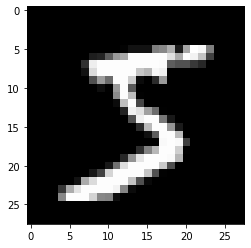

In [12]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print("Label: ",label)

Label:  3


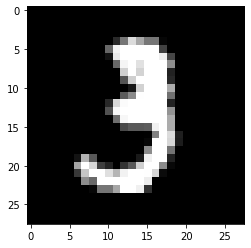

In [13]:
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print("Label: ",label)

In [14]:
import torchvision.transforms as transforms

In [15]:
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [16]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [17]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


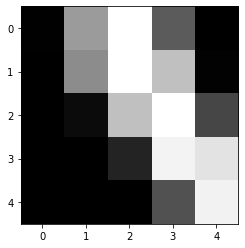

In [18]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [19]:
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])

In [20]:
print(len(train_ds))
print(len(val_ds))

50000
10000


In [21]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [22]:
!pip install jovian --upgrade --quiet

In [23]:
import jovian

In [24]:
jovian.commit(project='03-logistic-regression-practice')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/sagarp3199/03-logistic-regression-practice


'https://jovian.ai/sagarp3199/03-logistic-regression-practice'

In [25]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [26]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0039,  0.0297,  0.0046,  ...,  0.0057,  0.0120, -0.0223],
        [-0.0331, -0.0227, -0.0255,  ...,  0.0324,  0.0023, -0.0181],
        [ 0.0111, -0.0222,  0.0166,  ...,  0.0151, -0.0108,  0.0251],
        ...,
        [ 0.0187, -0.0203, -0.0001,  ...,  0.0182, -0.0353, -0.0227],
        [ 0.0039,  0.0335,  0.0212,  ...,  0.0210,  0.0270,  0.0066],
        [-0.0315,  0.0151,  0.0104,  ...,  0.0262, -0.0009, -0.0304]],
       requires_grad=True)

In [27]:


print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0097,  0.0167, -0.0165,  0.0222, -0.0074,  0.0175, -0.0236, -0.0136,
         0.0011,  0.0047], requires_grad=True)

In [28]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    break

tensor([6, 8, 4, 5, 7, 3, 3, 3, 3, 0, 1, 9, 6, 8, 7, 4, 3, 0, 8, 9, 6, 8, 8, 9,
        9, 4, 0, 2, 0, 4, 1, 4, 7, 1, 8, 7, 8, 8, 8, 0, 7, 3, 5, 8, 9, 2, 4, 9,
        1, 5, 3, 2, 0, 6, 6, 5, 3, 7, 9, 9, 4, 4, 8, 9, 8, 6, 7, 7, 1, 4, 9, 0,
        7, 4, 4, 5, 6, 2, 8, 6, 8, 7, 3, 5, 9, 0, 3, 4, 8, 8, 6, 4, 1, 2, 6, 8,
        3, 6, 6, 0, 0, 2, 3, 4, 9, 8, 3, 8, 9, 6, 8, 5, 0, 0, 5, 0, 8, 9, 2, 9,
        9, 3, 3, 8, 5, 0, 9, 1])
torch.Size([128, 1, 28, 28])


In [29]:
images.shape

torch.Size([128, 1, 28, 28])

In [30]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [31]:
class Person:
  def __init__(self,name,age):
    self.name=name
    self.age=age
  def say_hello(self):
    print("Hello my name is ",self.name+" !")

In [32]:
bob=Person("Bob",32)

In [33]:
bob.name,bob.age

('Bob', 32)

In [34]:
bob.say_hello()

Hello my name is  Bob !


In [35]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [36]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [37]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 1.6788e-03,  3.4726e-02,  2.8730e-02,  ...,  1.1735e-03,
           1.6887e-02,  3.4918e-02],
         [ 1.4177e-02, -3.8818e-03,  1.1222e-04,  ...,  6.8919e-03,
          -2.5403e-02,  3.1169e-02],
         [-2.3808e-03, -6.2468e-03, -3.0865e-02,  ...,  3.1504e-02,
           1.5345e-03, -2.4358e-02],
         ...,
         [ 1.3166e-02, -1.6516e-02,  1.7200e-06,  ...,  2.9514e-02,
          -5.1722e-03, -2.3513e-02],
         [ 1.5475e-02,  2.8591e-02, -4.6589e-03,  ..., -2.9775e-02,
          -1.8246e-02,  2.0400e-02],
         [ 6.1539e-03, -2.5592e-02, -9.3713e-03,  ...,  3.2065e-02,
          -7.0591e-03, -1.0515e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0157,  0.0132,  0.0314,  0.0078, -0.0248,  0.0061, -0.0232,  0.0178,
         -0.0327, -0.0039], requires_grad=True)]

In [38]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1640, -0.0458, -0.1294, -0.1642, -0.1336, -0.3706,  0.0327,  0.0597,
          0.1212,  0.4742],
        [-0.1197, -0.0286,  0.0786,  0.0099, -0.3206,  0.0491, -0.0423, -0.0618,
         -0.0718, -0.0068]])


In [39]:
import torch.nn.functional as F

In [40]:
outputs[:2]

tensor([[ 0.1640, -0.0458, -0.1294, -0.1642, -0.1336, -0.3706,  0.0327,  0.0597,
          0.1212,  0.4742],
        [-0.1197, -0.0286,  0.0786,  0.0099, -0.3206,  0.0491, -0.0423, -0.0618,
         -0.0718, -0.0068]], grad_fn=<SliceBackward>)

In [41]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1149, 0.0931, 0.0857, 0.0827, 0.0853, 0.0673, 0.1007, 0.1035, 0.1101,
         0.1567],
        [0.0929, 0.1018, 0.1133, 0.1058, 0.0760, 0.1100, 0.1004, 0.0984, 0.0975,
         0.1040]])
Sum:  1.0000001192092896


In [42]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 2, 8, 8, 9, 9, 8, 5, 9, 7, 7, 7, 2, 2, 2, 5, 8, 6, 9, 8, 9, 8, 9, 5,
        9, 9, 8, 7, 9, 8, 8, 9, 2, 5, 8, 8, 2, 3, 9, 8, 8, 7, 5, 8, 7, 9, 8, 5,
        9, 7, 3, 2, 8, 1, 8, 7, 9, 2, 5, 9, 9, 2, 8, 5, 8, 2, 5, 2, 8, 0, 8, 3,
        1, 9, 7, 8, 9, 8, 1, 2, 9, 2, 8, 8, 8, 1, 2, 9, 3, 3, 7, 9, 5, 2, 3, 1,
        6, 8, 3, 8, 8, 5, 7, 5, 9, 2, 9, 7, 9, 2, 9, 9, 2, 7, 1, 8, 8, 7, 7, 3,
        9, 8, 2, 7, 3, 2, 8, 8])
tensor([0.1567, 0.1133, 0.1269, 0.1397, 0.1321, 0.1401, 0.1295, 0.1220, 0.1399,
        0.1311, 0.1314, 0.1240, 0.1330, 0.1307, 0.1239, 0.1305, 0.1128, 0.1268,
        0.1250, 0.1479, 0.1308, 0.1568, 0.1229, 0.1137, 0.1381, 0.1470, 0.1417,
        0.1192, 0.1307, 0.1423, 0.1344, 0.1310, 0.1283, 0.1315, 0.1238, 0.1342,
        0.1181, 0.1188, 0.1419, 0.1372, 0.1329, 0.1436, 0.1390, 0.1417, 0.1325,
        0.1205, 0.1263, 0.1167, 0.1526, 0.1323, 0.1181, 0.1223, 0.1202, 0.1148,
        0.1236, 0.1162, 0.1468, 0.1184, 0.1334, 0.1513, 0.1516, 0.1196, 0.1211,
       

In [43]:
labels

tensor([0, 7, 5, 3, 4, 6, 6, 2, 0, 8, 5, 0, 3, 3, 1, 4, 9, 0, 4, 9, 3, 1, 4, 8,
        6, 0, 3, 6, 0, 8, 7, 6, 3, 4, 1, 5, 4, 7, 8, 3, 1, 8, 5, 4, 9, 4, 5, 8,
        2, 3, 7, 4, 1, 5, 3, 9, 0, 1, 3, 8, 8, 3, 9, 6, 5, 7, 6, 3, 5, 9, 3, 3,
        4, 0, 8, 4, 9, 1, 2, 9, 0, 4, 7, 3, 5, 6, 9, 8, 7, 7, 5, 8, 8, 2, 5, 8,
        0, 1, 2, 1, 2, 7, 8, 7, 2, 4, 5, 0, 9, 4, 0, 8, 9, 7, 8, 3, 9, 1, 7, 9,
        6, 1, 5, 3, 7, 1, 2, 8])

In [44]:
jovian.commit(project='03-logistic-regression-practice')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/sagarp3199/03-logistic-regression-practice


'https://jovian.ai/sagarp3199/03-logistic-regression-practice'

In [45]:
outputs[:2]

tensor([[ 0.1640, -0.0458, -0.1294, -0.1642, -0.1336, -0.3706,  0.0327,  0.0597,
          0.1212,  0.4742],
        [-0.1197, -0.0286,  0.0786,  0.0099, -0.3206,  0.0491, -0.0423, -0.0618,
         -0.0718, -0.0068]], grad_fn=<SliceBackward>)

In [46]:
torch.sum(preds==labels)

tensor(9)

In [47]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [48]:
accuracy(outputs,labels)

tensor(0.0703)

In [49]:
probs

tensor([[0.1149, 0.0931, 0.0857,  ..., 0.1035, 0.1101, 0.1567],
        [0.0929, 0.1018, 0.1133,  ..., 0.0984, 0.0975, 0.1040],
        [0.1044, 0.1150, 0.0781,  ..., 0.1044, 0.1269, 0.1182],
        ...,
        [0.0747, 0.1078, 0.1172,  ..., 0.1160, 0.1111, 0.1065],
        [0.0899, 0.1124, 0.0845,  ..., 0.1141, 0.1554, 0.1056],
        [0.0751, 0.0943, 0.1219,  ..., 0.0769, 0.1384, 0.0991]],
       grad_fn=<SoftmaxBackward>)

In [50]:
outputs

tensor([[ 0.1640, -0.0458, -0.1294,  ...,  0.0597,  0.1212,  0.4742],
        [-0.1197, -0.0286,  0.0786,  ..., -0.0618, -0.0718, -0.0068],
        [ 0.0073,  0.1032, -0.2837,  ...,  0.0069,  0.2023,  0.1310],
        ...,
        [-0.2514,  0.1149,  0.1987,  ...,  0.1885,  0.1452,  0.1035],
        [-0.0610,  0.1626, -0.1227,  ...,  0.1773,  0.4863,  0.0994],
        [-0.2860, -0.0580,  0.1980,  ..., -0.2623,  0.3249, -0.0084]],
       grad_fn=<AddmmBackward>)

In [51]:
loss_fn=F.cross_entropy

In [52]:
loss=loss_fn(outputs,labels)
print(loss)

tensor(2.3305, grad_fn=<NllLossBackward>)


In [53]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [54]:
l1=[1, 2, 3, 4, 5]

In [55]:
l2=[x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [56]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [57]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel() 

In [58]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.09592563658952713, 'val_loss': 2.2960872650146484}

In [59]:
history1=fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.9271, val_acc: 0.6563
Epoch [1], val_loss: 1.6611, val_acc: 0.7356
Epoch [2], val_loss: 1.4631, val_acc: 0.7637
Epoch [3], val_loss: 1.3138, val_acc: 0.7810
Epoch [4], val_loss: 1.1991, val_acc: 0.7927


In [61]:
history2=fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.8504, val_acc: 0.8283
Epoch [1], val_loss: 0.8194, val_acc: 0.8312
Epoch [2], val_loss: 0.7922, val_acc: 0.8342
Epoch [3], val_loss: 0.7682, val_acc: 0.8371
Epoch [4], val_loss: 0.7469, val_acc: 0.8388


In [62]:
history3=fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.7277, val_acc: 0.8413
Epoch [1], val_loss: 0.7105, val_acc: 0.8442
Epoch [2], val_loss: 0.6948, val_acc: 0.8457
Epoch [3], val_loss: 0.6804, val_acc: 0.8472
Epoch [4], val_loss: 0.6673, val_acc: 0.8499


In [63]:
history4=fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.6552, val_acc: 0.8513
Epoch [1], val_loss: 0.6441, val_acc: 0.8527
Epoch [2], val_loss: 0.6337, val_acc: 0.8533
Epoch [3], val_loss: 0.6241, val_acc: 0.8540
Epoch [4], val_loss: 0.6151, val_acc: 0.8549


Text(0.5, 1.0, 'Accuracy vs No. of epochs')

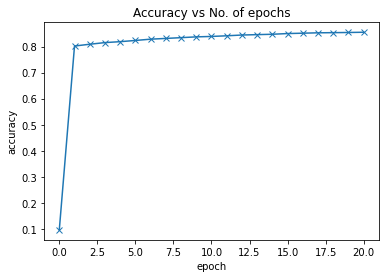

In [65]:
history=[result0]+history1+history2+history3+history4
accuracies=[result['val_acc']for result in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs')


In [66]:
jovian.log_metrics(val_acc=history[-1]['val_acc'],val_loss=history[-1]['val_loss'])

[jovian] Metrics logged.


In [67]:
jovian.commit(project='03-logistic-regression-practice',environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/sagarp3199/03-logistic-regression-practice


'https://jovian.ai/sagarp3199/03-logistic-regression-practice'

In [68]:
test_dataset=MNIST(root='data/',train=False,transform=transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


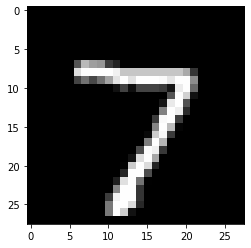

In [69]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape: ',img.shape)
print('Label: ',label)

In [70]:
def predict_image(img,model):
  xb=img.unsqueeze(0)
  yb=model(xb)
  _,preds=torch.max(yb,dim=1)
  return preds[0].item()

Label:  5  Predicted:  5


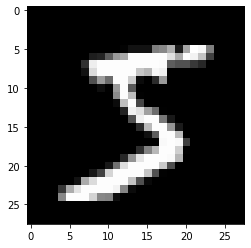

In [71]:
img,label=dataset[0]
plt.imshow(img[0],cmap='gray')
print('Label: ',label,' Predicted: ',predict_image(img,model))

Label:  3  Predicted:  3


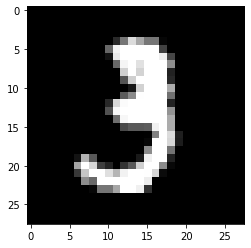

In [72]:
img,label=dataset[10]
plt.imshow(img[0],cmap='gray')
print('Label: ',label,' Predicted: ',predict_image(img,model))

Label:  4  Predicted:  4


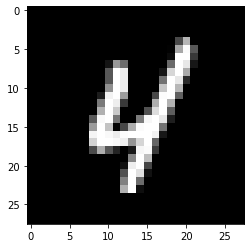

In [73]:
img,label=dataset[166]
plt.imshow(img[0],cmap='gray')
print('Label: ',label,' Predicted: ',predict_image(img,model))

Label:  5  Predicted:  3


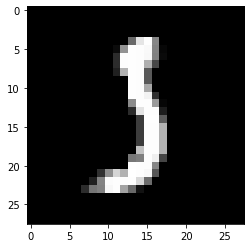

In [74]:
img,label=dataset[132]
plt.imshow(img[0],cmap='gray')
print('Label: ',label,' Predicted: ',predict_image(img,model))

In [75]:
test_loader=DataLoader(test_dataset,batch_size=256)
result=evaluate(model,test_loader)
result

{'val_acc': 0.8646484613418579, 'val_loss': 0.5879619121551514}

In [76]:
torch.save(model.state_dict(),'mnist-logistic.pth')

In [77]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0003, -0.0165,  0.0118,  ..., -0.0117,  0.0151, -0.0290],
                      [-0.0346,  0.0258,  0.0260,  ..., -0.0078,  0.0230,  0.0307],
                      [-0.0173, -0.0203, -0.0338,  ...,  0.0101,  0.0275, -0.0254],
                      ...,
                      [-0.0340, -0.0104,  0.0063,  ...,  0.0095,  0.0193,  0.0222],
                      [-0.0168, -0.0227,  0.0076,  ...,  0.0123,  0.0181, -0.0173],
                      [ 0.0005,  0.0113,  0.0302,  ..., -0.0101,  0.0325,  0.0094]])),
             ('linear.bias',
              tensor([-0.0284,  0.1038, -0.0110, -0.0182,  0.0158,  0.0349, -0.0442,  0.0498,
                      -0.1333, -0.0415]))])

In [78]:
model2=MnistModel()

In [79]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0299, -0.0145, -0.0037,  ..., -0.0166,  0.0279, -0.0287],
                      [-0.0240, -0.0080, -0.0011,  ...,  0.0352,  0.0075, -0.0118],
                      [ 0.0078,  0.0208,  0.0222,  ..., -0.0187, -0.0248,  0.0128],
                      ...,
                      [ 0.0109, -0.0338,  0.0080,  ..., -0.0158, -0.0013,  0.0200],
                      [-0.0298,  0.0219,  0.0313,  ..., -0.0123, -0.0101,  0.0255],
                      [-0.0176,  0.0277, -0.0083,  ...,  0.0193, -0.0294, -0.0196]])),
             ('linear.bias',
              tensor([ 0.0160, -0.0289, -0.0061, -0.0309,  0.0207, -0.0171,  0.0259,  0.0282,
                       0.0030,  0.0083]))])

In [80]:
evaluate(model2,test_loader)

{'val_acc': 0.10693359375, 'val_loss': 2.320242166519165}

In [81]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0003, -0.0165,  0.0118,  ..., -0.0117,  0.0151, -0.0290],
                      [-0.0346,  0.0258,  0.0260,  ..., -0.0078,  0.0230,  0.0307],
                      [-0.0173, -0.0203, -0.0338,  ...,  0.0101,  0.0275, -0.0254],
                      ...,
                      [-0.0340, -0.0104,  0.0063,  ...,  0.0095,  0.0193,  0.0222],
                      [-0.0168, -0.0227,  0.0076,  ...,  0.0123,  0.0181, -0.0173],
                      [ 0.0005,  0.0113,  0.0302,  ..., -0.0101,  0.0325,  0.0094]])),
             ('linear.bias',
              tensor([-0.0284,  0.1038, -0.0110, -0.0182,  0.0158,  0.0349, -0.0442,  0.0498,
                      -0.1333, -0.0415]))])

In [82]:
test_loader=DataLoader(test_dataset,batch_size=256)
result=evaluate(model2,test_loader)
result

{'val_acc': 0.8646484613418579, 'val_loss': 0.5879619121551514}

In [ ]:
jovian.commit(project=)